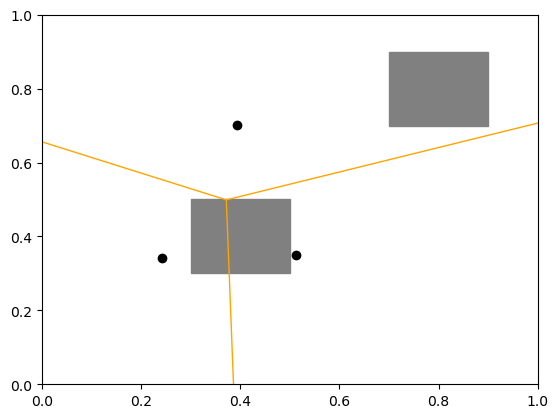

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d


# Define the obstacle as a polygon (list of vertices)
def is_inside_obstacle(point, obstacles):
    from matplotlib.path import Path
    for obstacle in obstacles:
        if Path(obstacle).contains_point(point):
            return True
    return False

# Compute centroid of a polygon
def polygon_centroid(vertices):
    x = vertices[:, 0]
    y = vertices[:, 1]
    a = 0.5 * np.sum(x[:-1] * y[1:] - x[1:] * y[:-1])
    cx = (1 / (6 * a)) * np.sum((x[:-1] + x[1:]) * (x[:-1] * y[1:] - x[1:] * y[:-1]))
    cy = (1 / (6 * a)) * np.sum((y[:-1] + y[1:]) * (x[:-1] * y[1:] - x[1:] * y[:-1]))
    return np.array([cx, cy])

# Generate initial points avoiding obstacles
def generate_points(num_points, bounds, obstacles):
    points = []
    while len(points) < num_points:
        point = np.random.uniform(bounds[0], bounds[1], 2)
        if not is_inside_obstacle(point, obstacles):
            points.append(point)
    return np.array(points)

# Plot Voronoi diagram with obstacles
def plot_voronoi(vor, obstacles, points):
    fig, ax = plt.subplots()
    voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='orange')
    for obstacle in obstacles:
        ax.fill(*zip(*obstacle), color='gray')
    ax.plot(points[:, 0], points[:, 1], 'ko')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    plt.show()

# Main function for CVT with obstacles
def centroidal_voronoi(num_points, iterations, bounds, obstacles):
    points = generate_points(num_points, bounds, obstacles)
    for _ in range(iterations):
        vor = Voronoi(points)
        new_points = []
        for i, region_index in enumerate(vor.point_region):
            region = vor.regions[region_index]
            if -1 in region or len(region) == 0:
                new_points.append(points[i])
                continue
            polygon = np.array([vor.vertices[v] for v in region + [region[0]]])
            if any(is_inside_obstacle(vertex, obstacles) for vertex in polygon):
                new_points.append(points[i])
            else:
                centroid = polygon_centroid(polygon)
                if not is_inside_obstacle(centroid, obstacles):
                    new_points.append(centroid)
                else:
                    new_points.append(points[i])
        points = np.array(new_points)
    plot_voronoi(vor, obstacles, points)

# Example usage
if __name__ == "__main__":
    bounds = np.array([[0, 0], [1, 1]])
    obstacles = [
        np.array([[0.3, 0.3], [0.5, 0.3], [0.5, 0.5], [0.3, 0.5]]),
        np.array([[0.7, 0.7], [0.9, 0.7], [0.9, 0.9], [0.7, 0.9]])
    ]
    centroidal_voronoi(num_points=20, iterations=50, bounds=bounds, obstacles=obstacles)
